In [29]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print(tf.__version__)

2.13.0


# Загрузка датасета MNIST

In [30]:
(train_x, train_y),(test_x, test_y) = tf.keras.datasets.mnist.load_data()



train_x = train_x.reshape(-1, 28, 28, 1).astype(np.float32) / 255
test_x = test_x.reshape(-1, 28, 28, 1).astype(np.float32) / 255

# Создание модели

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [32]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
NUM_EPOCH = 4

model.fit(train_x, train_y, epochs=NUM_EPOCH)

Epoch 1/4
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4388 - accuracy: 0.8671
Epoch 2/4
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1343 - accuracy: 0.9608
Epoch 3/4
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1011 - accuracy: 0.9690
Epoch 4/4
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0868 - accuracy: 0.9735


# Оценка качества обученной модели

In [34]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 4ms/step - loss: 0.0750 - accuracy: 0.9784


[0.07497498393058777, 0.9783999919891357]

# Сохранение модели

In [35]:
model.save('models/minst.model')

INFO:tensorflow:Assets written to: models/minst.model/assets


INFO:tensorflow:Assets written to: models/minst.model/assets


# PRODUCTION DEPLOYMENT

# Загрузка модели

In [36]:
model = tf.keras.models.load_model('models/minst.model')

# Загрузка датасета MNIST

In [37]:
(train_x, train_y),(test_x, test_y) = tf.keras.datasets.mnist.load_data()

test_x = test_x.reshape(-1, 28, 28, 1).astype(np.float32) / 255

In [38]:
def predict_digit(sample):
    prediction = model(sample[None, ...])[0]
    ans = np.argmax(prediction)
    fig = plt.figure(figsize=(12, 4))
    
    # Визуализация входного изображения
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(sample[:, :, 0], cmap='gray')
    plt.xticks([]), plt.yticks([])
    
    # Визуализация распределения вероятностей по классам
    ax = fig.add_subplot(1, 2, 2)
    bar_list = ax.bar(np.arange(10), prediction, align='center')
    bar_list[ans].set_color('g')
    ax.set_xticks(np.arange(10))
    ax.set_xlim([-1, 10])
    ax.grid(True)
    
    plt.show()
    
    print('Predictet number: {}'.format(ans))

# Пример запуска инференса
Возьмём случайную цифру из датасета MNIST и вызовем predict_digit для неё. Посмотрим на предсказание и на
правильный ответ.

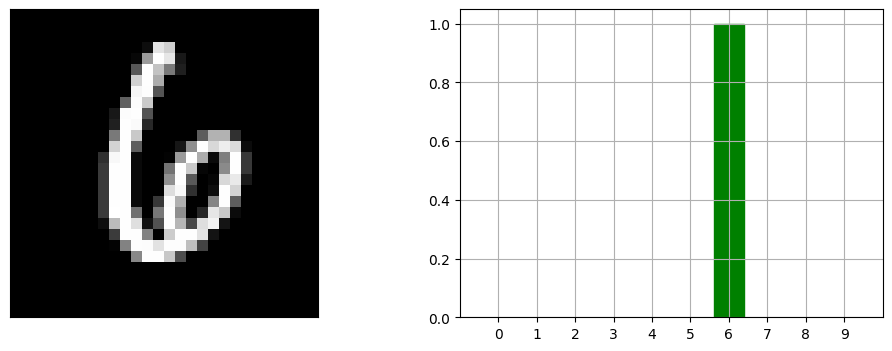

Predictet number: 6
True Answer: 6


In [46]:
import random
idx = random.randint(0, test_x.shape[0])
sample = test_x[idx, ...]
predict_digit(sample)

print('True Answer: {}'.format(test_y[idx]))

In [47]:
# tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]